In [1]:
from utils.analysis.tools import simDir
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
import pandas as pd
import seaborn as sns

In [2]:
root = (Path("/nfs/arupclab001/davidgoh/")
    / "CoupledEPCondensates/workspace/"
    / "01_Flow/20240218_SurfaceTension")

In [3]:
sweep_directory = Path(root)
sweep_file = sweep_directory / "sweep_parameters.txt"
sweep_parameters = [line.split(",")[0] for line in sweep_file.read_text().splitlines()]

In [4]:
simdir_paths = [file.parent for file in sweep_directory.glob("./*/input_params.txt")]

In [5]:
col = sweep_parameters + ["n_condensate", "max_eccentricity", "max_variance", "mean"]

In [6]:
def worker(worker_input):
    simdir_path = worker_input
    sd = simDir(simdir_path)
    val = []
    sd.run()
    sd.condensate()
    val.append(sd.params['kappa_tilde'])
    val.append(sd.params['initial_values'][0])
    
    try:
        val.append(sd.n_condensate().max())
    except:
        val.append(0)

    if val[2] == 1:
        val.append(sd.eccentricity.max())
        val.append(np.var(sd.radius,axis=1).max())
        val.append(np.mean(sd.radius))
    else:
        val += [np.nan, np.nan, np.nan]
    
    return val

In [7]:
simdir_paths = [file.parent for file in sweep_directory.glob("./*/input_params.txt")]
processes = mp.Pool(8-1)
results = processes.map(worker,simdir_paths)

  self.com = ((self.condensate_conc*self.geometry.mesh.cellVolumes)\

  self.com = ((self.condensate_conc*self.geometry.mesh.cellVolumes)\

  self.com = ((self.condensate_conc*self.geometry.mesh.cellVolumes)\

  self.com = ((self.condensate_conc*self.geometry.mesh.cellVolumes)\



In [8]:
# df = pd.DataFrame(results)
df = pd.read_pickle("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/01_Analysis/20240218_SurfaceTension.pkl")
# df.columns = col
pivot = df.pivot(index="initial_values",columns="kappa_tilde",values=["max_eccentricity","max_variance","mean", "n_condensate"])

In [9]:
from utils.plot import _FIGURE_DIR, get_size_inches, _CM

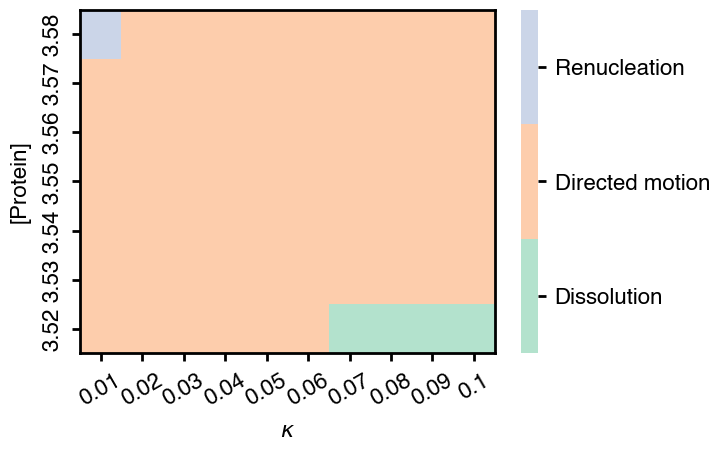

In [10]:
variable = "n_condensate"
cbarlabel = variable
fig, ax = plt.subplots(figsize=(8.5*_CM,8.5*_CM*2/3))
g = sns.heatmap(pivot[variable], ax = ax,
                cbar_kws={'label': ""},
                cmap=sns.color_palette(sns.color_palette("Pastel2")[:3]),
                vmin=0,vmax=2)

colorbar = ax.collections[0].colorbar 

ax.invert_yaxis()
ax.set_xlabel("$\kappa$")
ax.set_ylabel("[Protein]")
for spine in ax.spines:
    ax.spines[spine].set_visible(True)

n = 3
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(["Dissolution", "Directed motion", "Renucleation"])

ax.tick_params(axis='x', labelrotation=30)

# colorbar.remove()

plt.savefig(_FIGURE_DIR / "SIFig_SurfaceTension.pdf")  
plt.savefig(_FIGURE_DIR / "SIFig_SurfaceTension.png")  


In [11]:
# df.to_pickle("20240218_SurfaceTension.pkl")

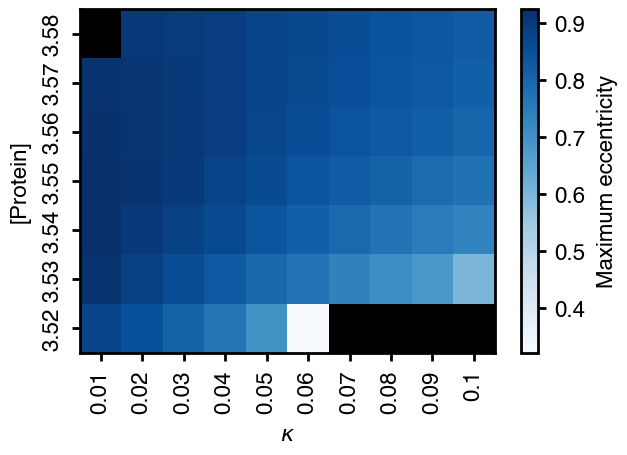

In [12]:
variable = "max_eccentricity"
cbarlabel = variable
fig, ax = plt.subplots(figsize=(8.5*_CM,8.5*_CM*2/3))

cmap = sns.color_palette("Blues", as_cmap=True)
cmap.set_bad(color='black')

g = sns.heatmap(
    pivot[variable],
    ax = ax,
    cbar_kws={
        'label': "Maximum eccentricity",
    },
    cmap = cmap,
    )
ax.invert_yaxis()
ax.set_xlabel("$\kappa$")
ax.set_ylabel("[Protein]")

cbar = g.collections[0].colorbar
cbar.outline.set_linewidth(1)

for spine in ax.spines:
    ax.spines[spine].set_visible(True)

plt.savefig(_FIGURE_DIR / "SIFig_SurfaceTensionEccentricity.pdf")  
plt.savefig(_FIGURE_DIR / "SIFig_SurfaceTensionEccentricity.png")  

In [13]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/01_Flow/20240218_SurfaceTension/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.1_kp_0.1_c1_3.54_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.0_kt_0.0_rl_0.0_wd_0.0")
sim.run()
sim.condensate()
x1, y1 = sim.com[:,0], sim.eccentricity

sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/01_Flow/20240218_SurfaceTension/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.05_kp_0.1_c1_3.54_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.0_kt_0.0_rl_0.0_wd_0.0")
sim.run()
sim.condensate()
x2, y2 = sim.com[:,0], sim.eccentricity

sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/01_Flow/20240218_SurfaceTension/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.01_kp_0.1_c1_3.54_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.0_kt_0.0_rl_0.0_wd_0.0")
sim.run()
sim.condensate()
x3, y3 = sim.com[:,0], sim.eccentricity

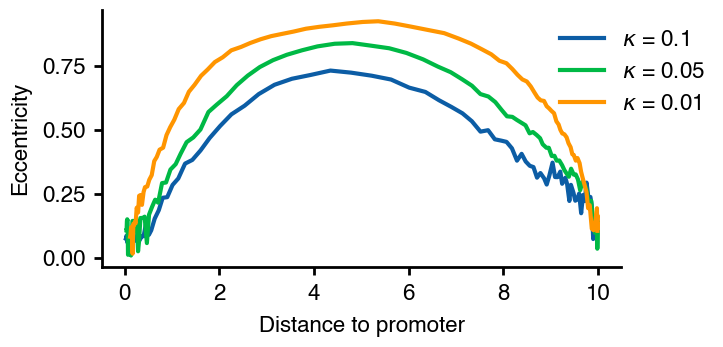

In [14]:
fig, ax = plt.subplots(figsize=(8.5*_CM,8.5*_CM/2))
ax.set_xlabel("Distance to promoter")
ax.set_ylabel("Eccentricity")

ax.plot(x1,y1,label="$\kappa$ = 0.1")
ax.plot(x2,y2,label="$\kappa$ = 0.05")
ax.plot(x3,y3,label="$\kappa$ = 0.01")
# ax.set_title("$k_p = 0.1$, $c_- = 3.54$")

ax.legend(bbox_to_anchor=[1.2,1],loc="upper right")

plt.savefig(_FIGURE_DIR / "SIFig_Eccentricity_Distance.pdf")
plt.savefig(_FIGURE_DIR / "SIFig_Eccentricity_Distance.png")